### Deliberable #3 - Final Jupyter Notebook 

#### 1. What is your issue of interest (provide sufficient background information)?

There are about 1.7 million people who develop sepsis and 270,000 deaths from sepsis every year in US. Sepsis is a kind of acute and life-threatening disease and needs to be diagnosed and treated quickly to avoid further damages in tissue and organs. Delayed treatment can lead to death. If the sepsis could be predicted at early stage, it could be very helpful for many patients.
    Sepsis is caused by the body's overactive reaction on infection usually caused by bacteria. The infection always starts with a small cut that then gets infected. Later on, the infection spreads in lung, stomach, kidney or bladder. Sepsis can also be caused by the infection during surery, the use of urinary catheter and other medical operations with a risk of infection. Risk factors of sepsis include age, weak immune system, chronic conditions.
  The medical diagonosis on sepsis involves checking a variety of infectious pathogens and other parameters including vital signs, lab test results. These features are quite diverse among individuals, which makes it chanllege to extract important features. This project aims to analysis the data and try to extract important features for sepsis prediction.
  
#### 2.  Why is this issue important to you and/or to others?

The early prediction could help the doctor make valuable and on-time treatment. This could also help to better allocate medical resources to the patient with signs of sepsis. As such, it not only stops further deterioration of sepsis, but also save medical resources.

#### 3.  What questions do you have in mind and would like to answer?

I want to check #1 whether the ICULOS (ICU length-of-stay hours since ICU admit) has relationship with the patient's age, since the older people could have low immunity, or there is some other tendance acccording to age. #2 whether man has more chance to get sepsis than women. #3 whether the BUN(Blood urea nitrogen), Cretinine, WBC, Hgb(Hemoglobin), Bilirubin_total, glucose and platelets show some diffrence between the people with and without sepsis.

#### 4.  Where do you get the data to help answer your questions?
My data is from: https://physionet.org/content/challenge-2019/1.0.0/, which is open-source and can be legally downloaded. The data is named "Early Prediction of Sepsis from Clinical Data". I am interested how sepsis could be early predicted, and what's the difference in the outcome between early predict and normal predict. I want to know How to apply machine learning model and predict the future dataset, maybe very challeging.

###### Vital signs (columns 1-8)
HR	Heart rate (beats per minute)
O2Sat	Pulse oximetry (%)
Temp	Temperature (Deg C)
SBP	Systolic BP (mm Hg)
MAP	Mean arterial pressure (mm Hg)
DBP	Diastolic BP (mm Hg)
Resp	Respiration rate (breaths per minute)
EtCO2	End tidal carbon dioxide (mm Hg)

###### Laboratory values (columns 9-34)
BaseExcess	Measure of excess bicarbonate (mmol/L)
HCO3	Bicarbonate (mmol/L)
FiO2	Fraction of inspired oxygen (%)
pH	N/A
PaCO2	Partial pressure of carbon dioxide from arterial blood (mm Hg)
SaO2	Oxygen saturation from arterial blood (%)
AST	Aspartate transaminase (IU/L)
BUN	Blood urea nitrogen (mg/dL)
Alkalinephos	Alkaline phosphatase (IU/L)
Calcium	(mg/dL)
Chloride	(mmol/L)
Creatinine	(mg/dL)
Bilirubin_direct	Bilirubin direct (mg/dL)
Glucose	Serum glucose (mg/dL)
Lactate	Lactic acid (mg/dL)
Magnesium	(mmol/dL)
Phosphate	(mg/dL)
Potassium	(mmol/L)
Bilirubin_total	Total bilirubin (mg/dL)
TroponinI	Troponin I (ng/mL)
Hct	Hematocrit (%)
Hgb	Hemoglobin (g/dL)
PTT	partial thromboplastin time (seconds)
WBC	Leukocyte count (count*10^3/µL)
Fibrinogen	(mg/dL)
Platelets	(count*10^3/µL)
Demographics (columns 35-40)
Age	Years (100 for patients 90 or above)
Gender	Female (0) or Male (1)
Unit1	Administrative identifier for ICU unit (MICU)
Unit2	Administrative identifier for ICU unit (SICU)
HospAdmTime	Hours between hospital admit and ICU admit
ICULOS	ICU length-of-stay (hours since ICU admit)
     Outcome (column 41)
SepsisLabel	For sepsis patients, SepsisLabel is 1 if t≥tsepsis−6 and 0 if t<tsepsis−6. For non-sepsis patients, SepsisLabel is 0.

#### 5.  What will be your unit of analysis (for example, patient, organization, or country)? Roughly how many units do you expect to analyze?

I will use the patients' medical lab result for analysis. patient is the unit. The dataset includes about 40,000 patients. For each patient, there are several different time points when the vital signs and other measurements were taken to monitor the patients' physiological status.

#### 6.  What variables/measures do you plan to use in your analysis?

ICULOS(ICU length-of-stay(hours since ICU admit), HospAdmTime, Age, Gender, SepsisLable. BUN(Blood urea nitrogen), Cretinine,WBC,Hgb(Hemoglobin), Bilirubin_total, glucose and platelets have some diffrence between the people with and withou sepsis.

#### 7.  What kinds of techniques do you you plan to use (for example, summary statistics, scatter plot, bar chart, chi-squared test)?

I plan to mainly use Pandas, OS, Numpy, Matplotlib, Seaborn, and Statsmodels to conduct summary statistics. The results will be visualized by scatter plot, bar chart.

## Libraries Used

In [1]:
from os import listdir
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from tqdm import tqdm
from os import path as osp
from multiprocessing import Pool
from time import time

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Unzip Files

In [ ]:
!unzip training_setA.zip

!unzip training_setB.zip

####  First way to reading files and consolidating them into one dataframe. 

In [ ]:
### with the help of this website: 
### https://stackoverflow.com/questions/36587211/easiest-way-to-read-csv-files-with-multiprocessing-in-pandas
from multiprocessing import Pool  

# wrap your csv importer in a function that can be mapped
def read_csv(filename):
    'converts a filename to a pandas dataframe'
    return pd.read_csv(filename)


def main():

    # get a list of file names
    files = os.listdir('.')
    file_list = [filename for filename in files if filename.split('.')[1]=='csv']

    # set up your pool with 8 processes.
    with Pool(processes=8) as pool: # or whatever your hardware can support
        begin = time()
        # have your pool map the file names to dataframes
        df_list = pool.map(read_csv, file_list)

        # reduce the list of dataframes to a single dataframe
        combined_df = pd.concat(df_list, ignore_index=True)
        finish = time()
        print((finish-begin)/60)

#### compare the time for different processes. 

In [ ]:
# set up your pool
with Pool(processes=3) as pool: # or whatever your hardware can support
    
    begin = time()
    # have your pool map the file names to dataframes
    df_list = pool.map(read_csv, filepaths)

    # reduce the list of dataframes to a single dataframe
    combined_df = pd.concat(df_list, ignore_index=True)
    finish = time()
    print((finish-begin)/60)

In [ ]:
len(combined_df) # check the size of the data.

In [ ]:
combined_df.head(5)

In [ ]:
# reset the index.
combined_df.reset_index(drop = True)
combined_df.iloc[180:200]

#### Second way to read and consolidating them into one dataframe.

In [101]:
#https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
filepaths_A = [osp.join("training/", f) for f in listdir("training/") if f.endswith('.psv')]
filepaths_B = [osp.join("training_setB/", f) for f in listdir("training_setB/") if f.endswith('.psv')]
filepaths = filepaths_A + filepaths_B

In [92]:
# wrap your csv importer in a function that can be mapped
def read_csv(filename):
    'converts a filename to a pandas dataframe'
    return pd.read_csv(filename, sep='|') #https://stackoverflow.com/questions/55997528/how-to-read-file-when-the-words-are-separated-by-psv

In [114]:
begin = time()
df = pd.concat(map(read_csv, filepaths))
finish = time()
print((finish-begin)/60)

3.8631390293439227


In [121]:
len(df) #check the size of the data.

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,9.9,223.0,160.0,77.27,1,0.0,1.0,-69.14,3,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,9.9,NaN,NaN,77.27,1,0.0,1.0,-69.14,4,0
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,5,0
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,6,0
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,7,0
5,76.0,100.0,36.20,124.00,65.0,41.50,14.0,NaN,0.0,25.0,...,12.0,NaN,169.0,77.27,1,0.0,1.0,-69.14,8,0
6,70.0,100.0,36.10,120.25,65.0,43.00,14.0,NaN,0.0,25.0,...,12.0,NaN,NaN,77.27,1,0.0,1.0,-69.14,9,0
7,67.0,100.0,36.40,130.50,73.0,49.00,14.0,NaN,0.0,NaN,...,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,10,0
8,64.5,100.0,36.55,116.75,62.5,42.50,14.0,NaN,0.0,NaN,...,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,11,0
9,65.0,99.0,36.90,117.50,61.0,43.50,21.0,NaN,NaN,24.0,...,10.1,NaN,154.0,77.27,1,0.0,1.0,-69.14,12,0


#### Third way to Combine all the patients' data into one DataFrame, the originally one.

In [9]:
# With the help of the link:https://github.com/jambo6/sepsis_competition_physionet_2019.
a_traincsv = listdir('training/')
b_traincsv = listdir('training_setB/')

with open('patient10102020.csv', 'w') as csvoutput:
  writer = csv.writer(csvoutput, lineterminator='\n')

  for ind, csv_name in enumerate(a_traincsv):
    with open('training/'+ csv_name,'r') as csvinput:

      reader = csv.reader(csvinput, delimiter='|')
      all = []
      
      if ind ==0 :
        row = next(reader)
        row.append('Patient_id')
        row.append('time')
        all.append(row)
      else:
        row = next(reader)

      for i,row in enumerate(reader):
        row.append(ind)
        row.append(i)
        
        
        all.append(row)

      writer.writerows(all)
 
  num = ind 

  for inde, csv_name in enumerate(b_traincsv):
    #if inde < 10000:
      num = num+1
      with open('training_setB/'+ csv_name,'r') as csvinput:


        reader = csv.reader(csvinput, delimiter='|')
        all = []


        row = next(reader)
        for i,row in enumerate(reader):
          row.append(num)
          row.append(i)

          all.append(row)

        writer.writerows(all)


In [ ]:
with open('patient10102020.csv', 'w') as csvoutput:  # create a blank csv and append all content to the .csv.
  writer = csv.writer(csvoutput, lineterminator='\n')

  for ind, csv_name in enumerate(a_traincsv):
    with open('training/'+ csv_name,'r') as csvinput:

      reader = csv.reader(csvinput, delimiter='|')
      all = []
      
      if ind ==0 :
        row = next(reader)
        row.append('Patient_id')
        row.append('time')
        all.append(row)
      else:
        row = next(reader)

      for i,row in enumerate(reader):
        row.append(ind)
        row.append(i)
        all.append(row)
      writer.writerows(all)

In [4]:
!ls  # Check the files list.

Data690_01_Project .ipynb
Data_Preprocessing_Temporal.ipynb
Deliverable #2 - Interim Work in Jupyter Notebook.ipynb
Deliverable #3 - Final Project.ipynb
EDA_Temporal.ipynb
Early_Prediction_of_Sepsis_From_Clinical_Data__The.10.pdf
interim Project 690-01-Copy1.ipynb
patient10102020.csv
physionet_challenge_2019_ccm_manuscript.pdf
test_patient.csv
train_patient.csv
training
training_setA.zip
training_setB
training_setB.zip
val_patient.csv


## 2. Read in the DataFrame and Check its basic information

In [3]:
df = pd.read_csv('patient10102020.csv') # Rename the csv file to df which is easier.
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,160.0,77.27,1,0.0,1.0,-69.14,3,0,0,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,NaN,77.27,1,0.0,1.0,-69.14,4,0,0,1
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,5,0,0,2
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,6,0,0,3
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,7,0,0,4


In [5]:
df.columns # check the column names.

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_id', 'time'],
      dtype='object')

In [6]:
df.isnull().sum() # check the sum of null value.

HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           1460001
Age                       0
Gender              

In [7]:
df.shape # Check the data size.

(1552210, 43)

In [8]:
df.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
count,1.398811e+06,1.349474e+06,525226.000000,1.325945e+06,1.358940e+06,1.065656e+06,1.313875e+06,57636.000000,84145.000000,65028.000000,...,92209.000000,1.552210e+06,1.552210e+06,940250.000000,940250.000000,1.552202e+06,1.552210e+06,1.552210e+06,1.552210e+06,1.552210e+06
mean,8.458144e+01,9.719395e+01,36.977228,1.237505e+02,8.240010e+01,6.383056e+01,1.872650e+01,32.957657,-0.689919,24.075481,...,196.013911,6.200947e+01,5.592690e-01,0.496571,0.503429,-5.612512e+01,2.699499e+01,1.798468e-02,2.006677e+04,2.549274e+01
std,1.732524e+01,2.936924e+00,0.770014,2.323156e+01,1.634175e+01,1.395601e+01,5.098194e+00,7.951662,4.294297,4.376504,...,103.635366,1.638622e+01,4.964749e-01,0.499989,0.499989,1.622569e+02,2.900542e+01,1.328956e-01,1.164922e+04,2.888256e+01
min,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,2.000000e+01,1.000000e+00,10.000000,-32.000000,0.000000,...,1.000000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.200000e+01,9.600000e+01,36.500000,1.070000e+02,7.100000e+01,5.400000e+01,1.500000e+01,28.000000,-3.000000,22.000000,...,126.000000,5.168000e+01,0.000000e+00,0.000000,0.000000,-4.705000e+01,1.100000e+01,0.000000e+00,9.964000e+03,9.000000e+00
50%,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,6.200000e+01,1.800000e+01,33.000000,0.000000,24.000000,...,181.000000,6.400000e+01,1.000000e+00,0.000000,1.000000,-6.030000e+00,2.100000e+01,0.000000e+00,1.998300e+04,1.900000e+01
75%,9.550000e+01,9.950000e+01,37.500000,1.380000e+02,9.200000e+01,7.200000e+01,2.150000e+01,38.000000,1.000000,26.800000,...,244.000000,7.400000e+01,1.000000e+00,1.000000,1.000000,-4.000000e-02,3.400000e+01,0.000000e+00,3.017500e+04,3.300000e+01
max,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,3.000000e+02,1.000000e+02,100.000000,100.000000,55.000000,...,2322.000000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00,4.033500e+04,3.350000e+02


In [9]:
df['Patient_id'].unique() # Get the unique Patient_id.

array([    0,     1,     2, ..., 40333, 40334, 40335])

In [10]:
df['Patient_id'].unique().shape # Get the number of the patient.

(40336,)

In [11]:
df['SepsisLabel'].unique() # check the SepsisLabel category.

array([0, 1])

In [12]:
df['time'].unique() #Check how many hours in the 'time' column.

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [13]:
df.groupby('SepsisLabel')['Age'].mean() # try to get the average age for each sepsisLabel.

SepsisLabel
0    62.009045
1    62.032591
Name: Age, dtype: float64

## 3. Exploratory Data Analysis

### 3.1 Check the feature difference between the patients with and without sepsis.

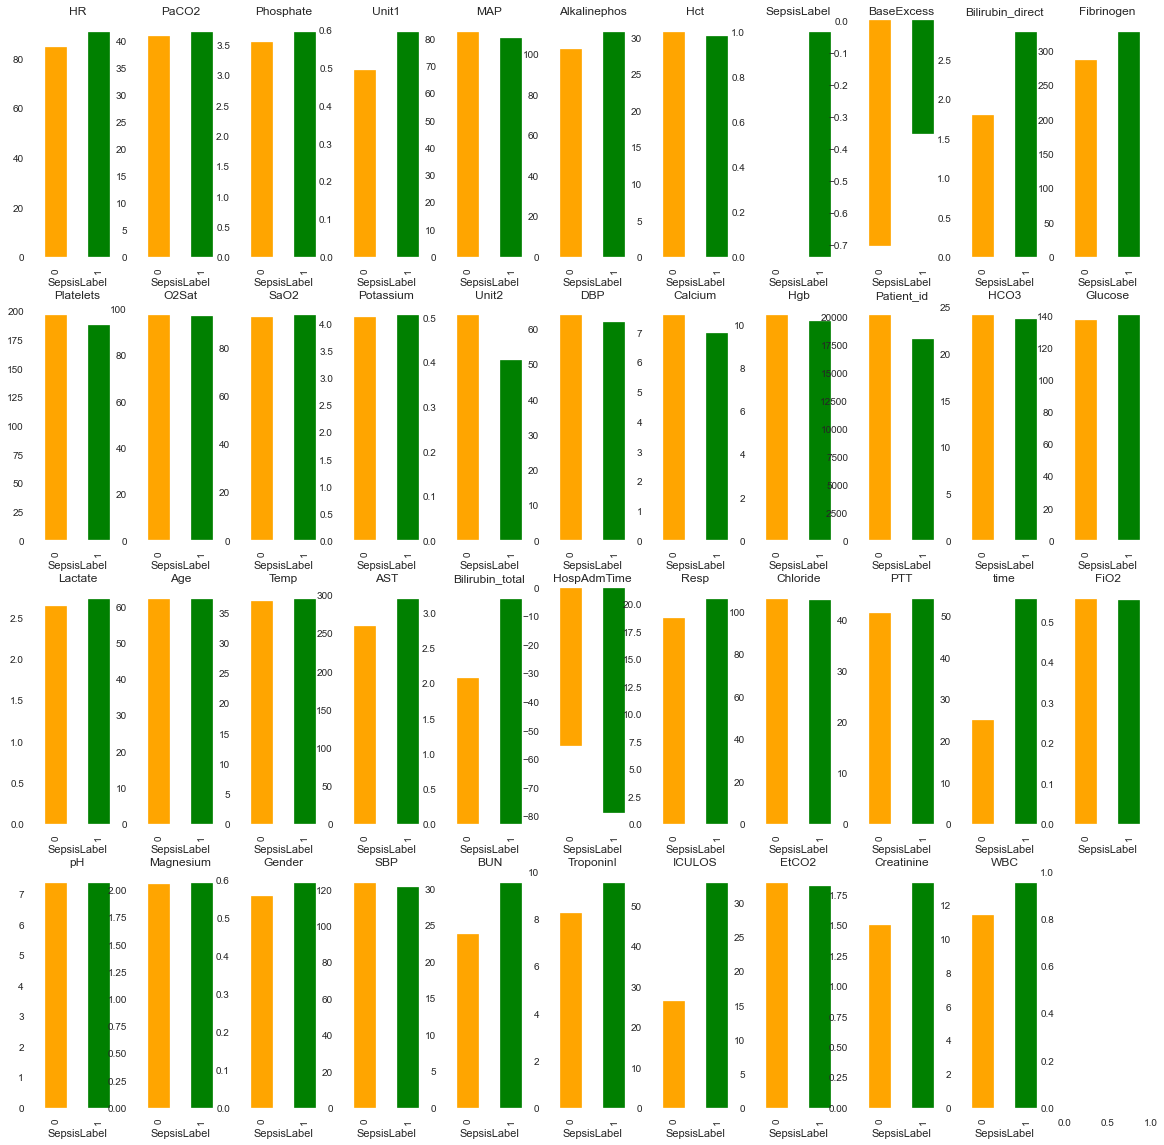

In [144]:
# The subplot is easy for this dataset which has so many columns, groupby the 'SepsisLabel' column.
fig, axes = plt.subplots(4, 11, figsize=(20,20))
for index, column in enumerate(df.columns):
    df.groupby('SepsisLabel')[column].mean().plot(kind = 'bar', title=column, ax = axes[index%4, index%11], color=['orange', 'green'])
   

### ### 1. Vital sign

  - 1.Heart rate (beats per minute) increase from average 80 to 90+.
  - 2.SBP Systolic BP (mm Hg) decrease a little bit. 
  - 3.MAP	Mean arterial pressure (mm Hg) decrease a little bit.
  - 4.DBP	Diastolic BP (mm Hg) decrease a little bit.
  - 5.Resp  Respiration rate (breaths per minute) increase from 18 to 22.
  - 6.EtCO2	End tidal carbon dioxide (mm Hg) decrease a little bit. 

### 2. Laboratory results

  - 1.BaseExcess	Measure of excess bicarbonate (mmol/L) increase from -0.7 to 0.35.
  - 2.AST	Aspartate transaminase (IU/L) increae from 255 to 290.
  - 3.BUN	Blood urea nitrogen (mg/dL) increase from 24 to 31.
  - 4.Alkalinephos	Alkaline phosphatase (IU/L) increase from 100 to 110.
  - 5.Calcium	(mg/dL)  decrease from 7.8 to 6.8.
  - 6.Creatinine	(mg/dL) increase from 1.5 to 1.8.
  - 7.Bilirubin_direct	Bilirubin direct (mg/dL) increase a lot from 1.75 to 3.0.
  - 8.Lactate	Lactic acid (mg/dL) increase a little bit from 2.6 to 2.9.
  - 9.Phosphate	(mg/dL) increase a little bit.
  - 10.Bilirubin_total	Total bilirubin (mg/dL) increase a lot from the average 2.0 to 3.5.
  - 11.TroponinI	Troponin I (ng/mL) increase a little bit from average 8 to average 9.5.
  - 12.PTT	partial thromboplastin time (seconds) increase a little bit from 41 to 45.
  - 13.WBC	Leukocyte count (count*10^3/µL) increase a lot from 11 to 13.
  - 14.Fibrinogen	(mg/dL) increase a lot from 290 to 340.
  - 15.Platelets	(count*10^3/µL) decrease a little bit from 198 to 188.

### 3. Demographics   

  - 1.Gender	Female (0) or Male (1)  Male has more cases than women.
  - 2.Unit1	Administrative identifier for ICU unit (MICU: medical intensive care unit), has more tendecy to get sepsis, or sepsis has more ratio of the total MICU.  
  - 3.Unit2	Administrative identifier for ICU unit (SICU:surgical intensive care unit), has less case happen sepsis, or sepsis has less ratio of the total SICU.
  - 4.ICULOS	ICU length-of-stay (hours since ICU admit) increase a lot, which is twice as sepsis as the non sepsis.

### 3.2 Check the feature difference between male and female.

In [153]:
df.dtypes

index                 int64
HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 

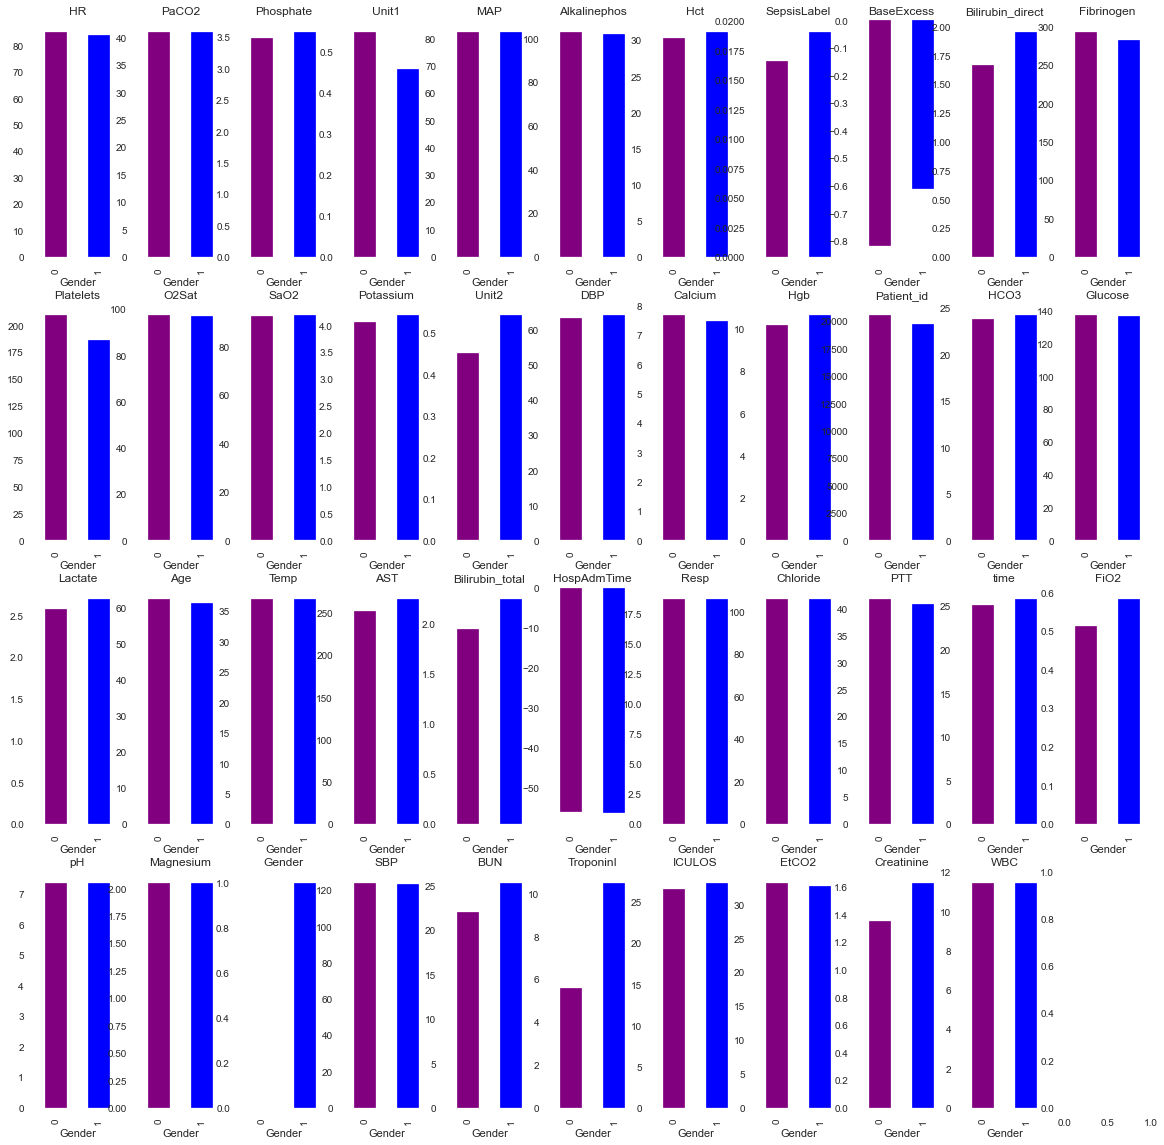

In [143]:
# groupby the 'Gender' column.
fig, axes = plt.subplots(4, 11, figsize=(20,20))
for index, column in enumerate(df.columns):
    df.groupby('Gender')[column].mean().plot(kind = 'bar', title=column, ax = axes[index%4, index%11], color=['purple', 'blue'])

In [16]:
len(df[df['SepsisLabel']==0]['Patient_id'].unique())

39910

In [17]:
Number_of_Female_in_ICU = len(df[df['Gender']==0]['Patient_id'].unique())
Number_of_Female_in_ICU

17770

In [18]:
Number_of_Male_in_ICU = len(df[df['SepsisLabel']==0]['Patient_id'].unique())- Number_of_Female_in_ICU
Number_of_Male_in_ICU

22140

In [19]:
Male_Female_in_ICU_ratio = Number_of_Male_in_ICU/Number_of_Female_in_ICU
Male_Female_in_ICU_ratio

1.2459200900393923

### 3.3 Select the patients with sepsis during hospital stay

In [20]:
patient_id_sepsis = df[df['SepsisLabel']==1]['Patient_id'].unique() #Get the unique Patient_id.

In [21]:
len(patient_id_sepsis)

2932

In [22]:
df_sepsis = df[df['Patient_id'].isin(patient_id_sepsis)]
df_sepsis

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
238,110.0,100.0,35.90,110.0,83.0,70.0,14.0,NaN,-4.0,20.0,...,NaN,66.36,1,0.0,1.0,-162.76,6,0,6,0
239,110.0,100.0,36.20,118.0,90.0,76.0,14.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,7,0,6,1
240,102.0,100.0,36.50,100.0,76.0,63.0,14.0,NaN,-4.0,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,8,0,6,2
241,101.0,100.0,36.10,121.0,87.0,71.0,15.0,NaN,-4.0,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,9,0,6,3
242,100.0,100.0,36.00,129.0,90.0,72.0,16.0,NaN,NaN,21.0,...,105.0,66.36,1,0.0,1.0,-162.76,10,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551484,87.5,100.0,37.35,146.0,101.5,72.5,14.5,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,6,1,40323,5
1551485,74.0,100.0,37.20,140.0,98.0,69.0,14.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,7,1,40323,6
1551486,85.0,97.0,NaN,147.0,100.0,70.0,12.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,8,1,40323,7
1551487,78.0,99.0,NaN,157.0,110.0,77.0,12.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,9,1,40323,8


### 3.3.1 Check the number of women and men in sepsis group.

In [23]:
Number_of_Female_in_sepsis = len(df_sepsis[df_sepsis['Gender']==0]['Patient_id'].unique())
Number_of_Female_in_sepsis

1193

In [24]:
Number_of_Male_in_sepsis = (len(patient_id_sepsis)) - Number_of_Female_in_sepsis
Number_of_Male_in_sepsis

1739

In [25]:
Male_Female_in_sepsis_ratio = Number_of_Male_in_sepsis/Number_of_Female_in_sepsis
Male_Female_in_sepsis_ratio

1.4576697401508802

### In sepsis group, the ratio of the male to female is 1.458.

### 3.3.2 The average age for the sepsis group is 66.36.

In [26]:
Age_list_sepsis = df_sepsis[df_sepsis['Patient_id'].isin(patient_id_sepsis)][df_sepsis['time']==0]['Age']
Age_list_sepsis

238        66.36
2055       60.42
2160       82.79
2421       45.98
2816       80.26
           ...  
1549337    87.00
1550041    57.00
1550461    72.00
1551431    52.00
1551479    39.00
Name: Age, Length: 2932, dtype: float64

In [27]:
Age_list_sepsis.mean

<bound method Series.mean of 238        66.36
2055       60.42
2160       82.79
2421       45.98
2816       80.26
           ...  
1549337    87.00
1550041    57.00
1550461    72.00
1551431    52.00
1551479    39.00
Name: Age, Length: 2932, dtype: float64>

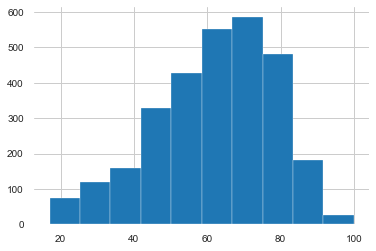

In [28]:
Age_list_sepsis.hist()

In [29]:
df_sepsis.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
count,160238.000000,156621.000000,60914.000000,148574.000000,157567.000000,128858.000000,150149.000000,18114.000000,15309.000000,9926.000000,...,11290.00000,172410.000000,172410.000000,87460.000000,87460.000000,172410.000000,172410.000000,172410.000000,172410.000000,172410.000000
mean,88.093556,97.300656,37.105103,124.175037,81.941918,62.744197,19.802851,32.807883,-0.308312,23.937971,...,186.86136,62.263144,0.589409,0.522948,0.477052,-80.538132,60.328496,0.161916,18154.756366,58.675912
std,18.504632,3.012365,0.903196,24.354515,16.210614,13.725244,5.870755,7.516207,4.512128,4.720720,...,113.71067,16.166759,0.491943,0.499476,0.499476,223.099570,56.553072,0.368375,11517.984004,56.449369
min,20.000000,20.000000,26.670000,22.000000,20.000000,21.000000,1.000000,10.000000,-23.000000,5.000000,...,2.00000,17.000000,0.000000,0.000000,0.000000,-3141.550000,1.000000,0.000000,6.000000,0.000000
25%,75.000000,96.000000,36.560000,106.000000,70.670000,53.000000,16.000000,28.000000,-3.000000,21.000000,...,105.00000,52.350000,0.000000,0.000000,0.000000,-68.550000,17.000000,0.000000,8471.000000,16.000000
50%,87.000000,98.000000,37.110000,122.000000,80.000000,61.000000,19.000000,33.000000,0.000000,24.000000,...,168.00000,64.940000,1.000000,1.000000,0.000000,-3.370000,43.000000,0.000000,16458.000000,41.000000
75%,100.000000,100.000000,37.700000,140.000000,92.000000,71.000000,23.000000,37.000000,2.000000,27.000000,...,241.00000,74.000000,1.000000,1.000000,1.000000,-0.030000,86.000000,0.000000,28130.000000,85.000000
max,223.000000,100.000000,41.400000,299.000000,298.000000,292.000000,100.000000,100.000000,21.000000,45.000000,...,1081.00000,100.000000,1.000000,1.000000,1.000000,16.020000,336.000000,1.000000,40323.000000,335.000000


### 3.4 Select the patients with no sepsis all the time

In [30]:
df_no_sepsis = df[~df['Patient_id'].isin(patient_id_sepsis)]
df_no_sepsis

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,160.0,77.27,1,0.0,1.0,-69.14,3,0,0,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,NaN,77.27,1,0.0,1.0,-69.14,4,0,0,1
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,5,0,0,2
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,6,0,0,3
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,77.27,1,0.0,1.0,-69.14,7,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,73.0,96.0,NaN,119.00,75.0,51.00,23.5,NaN,NaN,NaN,...,NaN,67.00,0,NaN,NaN,-11.93,17,0,40335,16
1552206,76.0,96.0,36.90,138.00,88.0,61.00,21.5,NaN,NaN,NaN,...,NaN,67.00,0,NaN,NaN,-11.93,18,0,40335,17
1552207,76.0,96.0,NaN,135.50,88.0,61.00,21.5,NaN,NaN,NaN,...,NaN,67.00,0,NaN,NaN,-11.93,19,0,40335,18
1552208,69.0,96.0,NaN,122.50,77.5,51.50,20.5,NaN,NaN,NaN,...,NaN,67.00,0,NaN,NaN,-11.93,20,0,40335,19


In [31]:
len(df_no_sepsis['Patient_id'].unique())

37404

### 3.4.1 get the number of female and male without sepsis.

In [32]:
Number_of_Female_without_sepsis = len(df_no_sepsis[df_no_sepsis['Gender']==0]['Patient_id'].unique())
Number_of_Female_without_sepsis

16577

In [33]:
Number_of_Male_without_sepsis = len(df_no_sepsis['Patient_id'].unique())- Number_of_Female_without_sepsis
Number_of_Male_without_sepsis

20827

In [34]:
Male_Female_without_sepsis_ratio = Number_of_Male_without_sepsis/Number_of_Female_without_sepsis
Male_Female_without_sepsis_ratio

1.2563793207456113

### In the without sepsis group, the ratio of male to female is 1.256.

### 3.4.2 The average age for the patient without sepsis  is 77.27.

In [35]:
patient_id_without_sepsis = df[df['SepsisLabel']==0]['Patient_id'].unique()

In [36]:
len(patient_id_without_sepsis)

39910

In [37]:
Age_list_without_sepsis = df_no_sepsis[df_no_sepsis['Patient_id'].isin(patient_id_without_sepsis)][df_no_sepsis['time']==0]['Age']
Age_list_without_sepsis.mean

<bound method Series.mean of 0          77.27
55         65.55
99         52.16
134        24.35
167        82.51
           ...  
1552023    69.00
1552039    88.00
1552073    77.00
1552130    77.00
1552189    67.00
Name: Age, Length: 37404, dtype: float64>

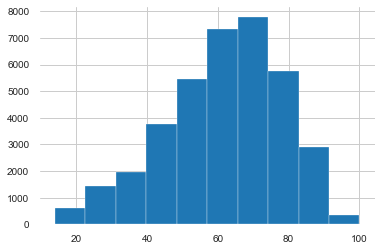

In [38]:
Age_list_without_sepsis.hist()

### 3.5.1 Compare the age distribution between the patients with and without sepsis

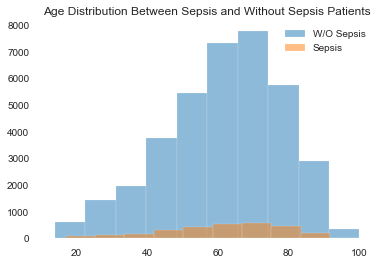

In [39]:
plt.hist(Age_list_without_sepsis, alpha=0.5, label='W/O Sepsis')
plt.hist(Age_list_sepsis, alpha=0.5, label='Sepsis')
plt.legend(loc='upper right')
plt.title("Age Distribution Between Sepsis and Without Sepsis Patients")
plt.show()

### According the graph showed above, the age is not a critical feature, althought the average age for sepsis is 66, and the average age for without sepsis group is  77, but it only show the icu has more old patients.

### 3.5.2 Compare the male/female ratio between the patients with and without sepsis

/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


<BarContainer object of 2 artists>

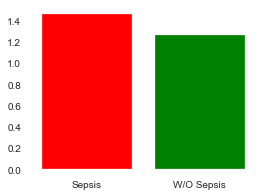

In [40]:
plt.figure(figsize=(4, 3))
plt.bar(["Sepsis", "W/O Sepsis"],[Male_Female_in_sepsis_ratio, Male_Female_without_sepsis_ratio], color='rgb')

## 3.6 Select the patients developed sepsis from "0" to "1"

In [146]:
patient_id_sepsis_develop = df_sepsis[df_sepsis['SepsisLabel'] == 0]['Patient_id'].unique()

In [42]:
len(patient_id_sepsis_develop)

2506

In [147]:
df_sepsis_develop = df_sepsis[df_sepsis['Patient_id'].isin(patient_id_sepsis_develop)]

In [148]:
df_sepsis_develop

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
238,110.0,100.0,35.9,110.0,83.0,70.0,14.0,NaN,-4.0,20.0,...,NaN,66.36,1,0.0,1.0,-162.76,6,0,6,0
239,110.0,100.0,36.2,118.0,90.0,76.0,14.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,7,0,6,1
240,102.0,100.0,36.5,100.0,76.0,63.0,14.0,NaN,-4.0,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,8,0,6,2
241,101.0,100.0,36.1,121.0,87.0,71.0,15.0,NaN,-4.0,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,9,0,6,3
242,100.0,100.0,36.0,129.0,90.0,72.0,16.0,NaN,NaN,21.0,...,105.0,66.36,1,0.0,1.0,-162.76,10,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551453,100.0,94.0,35.7,86.0,60.0,50.0,25.5,19.0,NaN,NaN,...,NaN,52.00,1,0.0,1.0,-29.08,25,1,40321,22
1551454,92.0,96.0,35.7,148.0,96.0,76.0,25.0,25.0,NaN,NaN,...,NaN,52.00,1,0.0,1.0,-29.08,26,1,40321,23
1551455,102.0,98.0,36.0,140.0,92.0,70.0,25.0,25.0,NaN,NaN,...,46.0,52.00,1,0.0,1.0,-29.08,27,1,40321,24
1551456,88.0,99.0,36.0,148.0,102.0,74.0,25.0,24.0,NaN,NaN,...,NaN,52.00,1,0.0,1.0,-29.08,28,1,40321,25


In [45]:
df_sepsis_develop[43:58]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
281,103.0,96.0,36.78,137.0,92.0,70.0,23.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,49,0,6,43
282,112.0,100.0,NaN,138.0,90.0,69.0,25.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,50,0,6,44
283,111.0,97.0,NaN,140.0,91.0,69.0,27.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,51,1,6,45
284,112.0,95.0,NaN,129.0,86.0,65.0,29.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,52,1,6,46
285,109.0,100.0,NaN,127.0,84.0,62.0,29.0,NaN,NaN,NaN,...,106.0,66.36,1,0.0,1.0,-162.76,53,1,6,47
286,99.0,96.0,36.61,140.0,95.0,71.0,28.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,54,1,6,48
287,112.0,97.0,NaN,134.0,90.0,67.0,24.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,55,1,6,49
288,105.0,100.0,NaN,142.0,96.0,72.0,25.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,56,1,6,50
289,117.0,95.0,NaN,126.0,83.0,62.0,24.0,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,57,1,6,51
290,114.0,94.0,36.83,144.0,96.0,71.0,26.0,NaN,0.0,23.0,...,103.0,66.36,1,0.0,1.0,-162.76,58,1,6,52


In [46]:
df_sepsis_develop[185:200]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
2552,80.0,94.0,NaN,109.0,73.0,58.0,27.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,132,0,71,131
2553,80.0,95.0,36.33,120.0,85.0,70.0,28.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,133,0,71,132
2554,79.0,96.0,NaN,123.0,86.0,70.0,28.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,134,0,71,133
2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,135,0,71,134
2556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,136,1,71,135
2557,85.5,95.0,36.83,128.0,87.5,71.5,22.0,NaN,NaN,25.0,...,NaN,45.98,1,NaN,NaN,-219.74,137,1,71,136
2558,87.0,94.0,NaN,126.0,85.0,69.0,28.0,NaN,0.0,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,138,1,71,137
2559,86.0,96.0,NaN,130.0,86.0,68.0,24.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,139,1,71,138
2560,90.0,94.0,NaN,150.0,102.0,83.0,30.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,140,1,71,139
2561,92.0,98.0,36.61,154.0,104.0,85.0,33.0,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,141,1,71,140


In [149]:
df_sepsis_develop.shape

(168764, 43)

In [150]:
df_sepsis_develop = df_sepsis_develop.drop(['O2Sat','SBP', 'Temp','MAP', 'DBP','EtCO2','Phosphate', 'HCO3','FiO2', 'pH', 'PaCO2', 'SaO2','Chloride','Glucose','Magnesium','Potassium','Hct', 'Hgb'], axis=1)

In [151]:
df_sepsis_develop.columns

Index(['HR', 'Resp', 'BaseExcess', 'AST', 'BUN', 'Alkalinephos', 'Calcium',
       'Creatinine', 'Bilirubin_direct', 'Lactate', 'Bilirubin_total',
       'TroponinI', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_id',
       'time'],
      dtype='object')

In [152]:
df_sepsis_develop.dtypes

HR                  float64
Resp                float64
BaseExcess          float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Creatinine          float64
Bilirubin_direct    float64
Lactate             float64
Bilirubin_total     float64
TroponinI           float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender                int64
Unit1               float64
Unit2               float64
HospAdmTime         float64
ICULOS                int64
SepsisLabel           int64
Patient_id            int64
time                  int64
dtype: object

### select 5 time points (5 hours) before and after sepsis happen.

In [153]:
df_count_0 = df_sepsis_develop.groupby(['Patient_id', 'SepsisLabel'])['time'].count().unstack().reset_index()
df_count_0

SepsisLabel,Patient_id,0,1
0,6,45,9
1,71,135,10
2,78,26,10
3,92,103,10
4,104,64,10
...,...,...,...
2501,40242,38,10
2502,40261,88,2
2503,40280,25,10
2504,40292,70,10


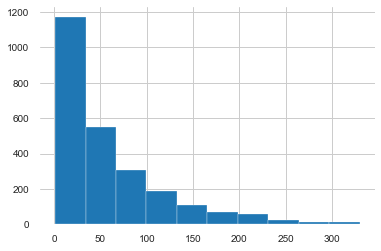

In [90]:
df_count_0[0].hist()

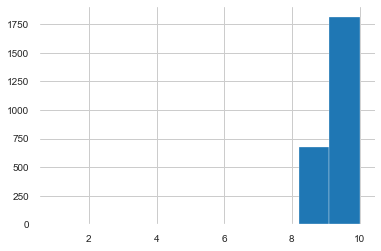

In [91]:
df_count_0[1].hist()

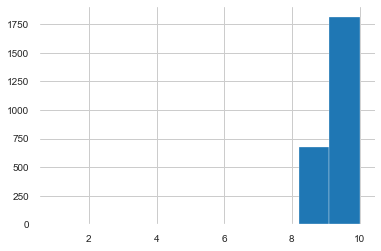

In [92]:
df_count_0[1].hist()

### 3.6.1 Select patients have 5 time point (5 hours) before and after sepsis. 

In [154]:
patients_less_5 = df_count_0[(df_count_0[0] < 5) | (df_count_0[1] < 5)]['Patient_id'].to_list()

In [155]:
len(patients_less_5)

252

In [156]:
df_count_0_more_than_5 = df_count_0[~df_count_0['Patient_id'].isin(patients_less_5)]
df_count_0_more_than_5

SepsisLabel,Patient_id,0,1
0,6,45,9
1,71,135,10
2,78,26,10
3,92,103,10
4,104,64,10
...,...,...,...
2500,40235,14,10
2501,40242,38,10
2503,40280,25,10
2504,40292,70,10


### create new dataframe having 5 time point before and after sepsis

In [157]:
df_sepsis_develop_5 = pd.DataFrame(columns=df_sepsis_develop.columns)

In [158]:
df_sepsis_develop[df_sepsis_develop['Patient_id']==6].index.values.astype(int)

array([238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
       264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
       277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
       290, 291])

In [159]:
df_sepsis_develop[df_sepsis_develop['Patient_id']==6].index.values

array([238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
       264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
       277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
       290, 291])

In [160]:
for id in df_count_0_more_than_5['Patient_id'].to_list():
    start_index = df_sepsis_develop[df_sepsis_develop['Patient_id']==id].index.values.astype(int)[0]
    start_index_5 = int(start_index) + int(df_count_0_more_than_5[df_count_0_more_than_5['Patient_id']==id][0]) - 5
    new_rows = df_sepsis_develop.loc[start_index_5:start_index_5+9]
    df_sepsis_develop_5=df_sepsis_develop_5.append(new_rows)

In [161]:
df_sepsis_develop_5.head(20)

,HR,Resp,BaseExcess,AST,BUN,Alkalinephos,Calcium,Creatinine,Bilirubin_direct,Lactate,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
278,93.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,46,0,6,40
279,97.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,47,0,6,41
280,90.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,48,0,6,42
281,103.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,49,0,6,43
282,112.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,50,0,6,44
283,111.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,51,1,6,45
284,112.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,52,1,6,46
285,109.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.0,66.36,1,0.0,1.0,-162.76,53,1,6,47
286,99.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,54,1,6,48
287,112.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,55,1,6,49


In [162]:
df_sepsis_develop_5.dtypes # check the column type.

HR                  float64
Resp                float64
BaseExcess          float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Creatinine          float64
Bilirubin_direct    float64
Lactate             float64
Bilirubin_total     float64
TroponinI           float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender               object
Unit1               float64
Unit2               float64
HospAdmTime         float64
ICULOS               object
SepsisLabel          object
Patient_id           object
time                 object
dtype: object

In [163]:
df_sepsis_develop_5['time'] = df_sepsis_develop_5['time'].astype(int) # change the type to integer.
df_sepsis_develop_5['Gender'] = df_sepsis_develop_5['Gender'].astype(int)
df_sepsis_develop_5['ICULOS'] = df_sepsis_develop_5['ICULOS'].astype(int)
df_sepsis_develop_5['SepsisLabel'] = df_sepsis_develop_5['SepsisLabel'].astype(int)
df_sepsis_develop_5['Patient_id']= df_sepsis_develop_5['Patient_id'].astype(int)

In [164]:
df_sepsis_develop_5.dtypes

HR                  float64
Resp                float64
BaseExcess          float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Creatinine          float64
Bilirubin_direct    float64
Lactate             float64
Bilirubin_total     float64
TroponinI           float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender                int64
Unit1               float64
Unit2               float64
HospAdmTime         float64
ICULOS                int64
SepsisLabel           int64
Patient_id            int64
time                  int64
dtype: object

In [166]:
df_sepsis_develop_5.shape

(22540, 25)

### 3.6.2 Check the feature difference 5 hours before and after sepsis happens

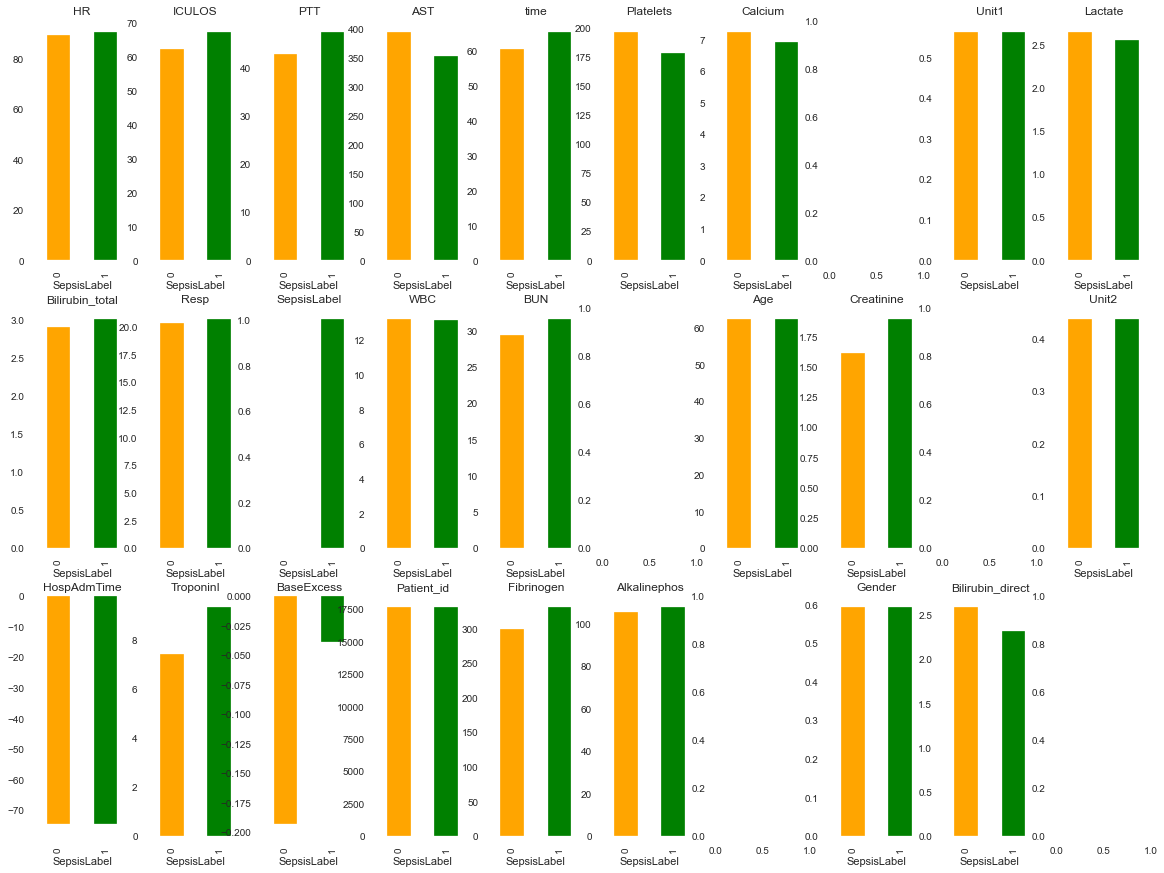

In [168]:
fig, axes = plt.subplots(3, 10, figsize=(20,15))
for index, column in enumerate(df_sepsis_develop_5.columns):
    df_sepsis_develop_5.groupby('SepsisLabel')[column].mean().plot(kind = 'bar', title=column, ax = axes[index%3, index%10], color=['orange', 'green'])

## 5 hours early in early sepsis (check the lab results when SepsisLable is 0)
### 1. Vital sign

  - 1.Heart rate (beats per minute) increase from average 80 to 90+.**90**
  - 5.Resp  Respiration rate (breaths per minute) increase from 18 to 20.**20**

### 2. Laboratory results

 
  - 2.AST	Aspartate transaminase (IU/L) increae from 255 to 290. **390**
  - 3.BUN	Blood urea nitrogen (mg/dL) increase from 24 to 31.  **30**
  - 4.Alkalinephos	Alkaline phosphatase (IU/L) increase from 100 to 110.**110**,
  - 7.Bilirubin_direct	Bilirubin direct (mg/dL) increase a lot from 1.75 to 3.0. **2.6**.
  - 10.Bilirubin_total	Total bilirubin (mg/dL) increase a lot from the average 2.0 to 3.5.**3.0**
  - 12.PTT	partial thromboplastin time (seconds) increase a little bit from 41 to 45. **43**
  - 13.WBC	Leukocyte count (count*10^3/µL) increase a lot from 11 to 13.**14**
  - 15.Platelets	(count*10^3/µL) decrease a little bit from 198 to 188. **190**

### 3. Demographics   

  - 1.Gender	Female (0) or Male (1)  Male has more cases than women.
  - 2.Unit1	Administrative identifier for ICU unit (MICU: medical intensive care unit), has more tendecy to get sepsis, or sepsis has more ratio of the total MICU.  
  - 3.Unit2	Administrative identifier for ICU unit (SICU:surgical intensive care unit), has less case happen sepsis, or sepsis has less ratio of the total SICU.
  - 4.ICULOS	ICU length-of-stay (hours since ICU admit) increase a lot, which is twice as sepsis as the non sepsis.

### 3.6.3 Select the patients with the 10 time point (10 hours) before and 10 time points (10 hours) hours after the sepsis.

In [169]:
patients_less_10 = df_count_0[(df_count_0[0] < 10) | (df_count_0[1] < 10)]['Patient_id'].to_list()

In [170]:
len(patients_less_10)

1058

In [171]:
df_count_0_more_than_10 = df_count_0[~df_count_0['Patient_id'].isin(patients_less_10)]
df_count_0_more_than_10

SepsisLabel,Patient_id,0,1
1,71,135,10
2,78,26,10
3,92,103,10
4,104,64,10
6,166,23,10
...,...,...,...
2500,40235,14,10
2501,40242,38,10
2503,40280,25,10
2504,40292,70,10


In [172]:
df_sepsis_develop_10 = pd.DataFrame(columns=df_sepsis_develop.columns)

In [173]:
for id in tqdm(df_count_0_more_than_10['Patient_id'].to_list()):
    start_index = df_sepsis_develop[df_sepsis_develop['Patient_id']==id].index.values.astype(int)[0]
    start_index_10 = int(start_index) + int(df_count_0_more_than_10[df_count_0_more_than_10['Patient_id']==id][0]) - 10
    new_rows = df_sepsis_develop.loc[start_index_10:start_index_10+19]
    df_sepsis_develop_10=df_sepsis_develop_10.append(new_rows)

100%|██████████| 1448/1448 [00:15<00:00, 94.31it/s]


### 3.6.4 Check the feature difference 10 hours before and after sepsis happens

In [176]:
df_sepsis_develop_10['time'] = df_sepsis_develop_10['time'].astype(int) # change the type to integer.
df_sepsis_develop_10['Gender'] = df_sepsis_develop_10['Gender'].astype(int) # change the type to integer
df_sepsis_develop_10['ICULOS'] = df_sepsis_develop_10['ICULOS'].astype(int) # change the type to integer.
df_sepsis_develop_10['SepsisLabel'] = df_sepsis_develop_10['SepsisLabel'].astype(int) #change the type to integer.
df_sepsis_develop_10['Patient_id']= df_sepsis_develop_10['Patient_id'].astype(int) # change the type to integer.

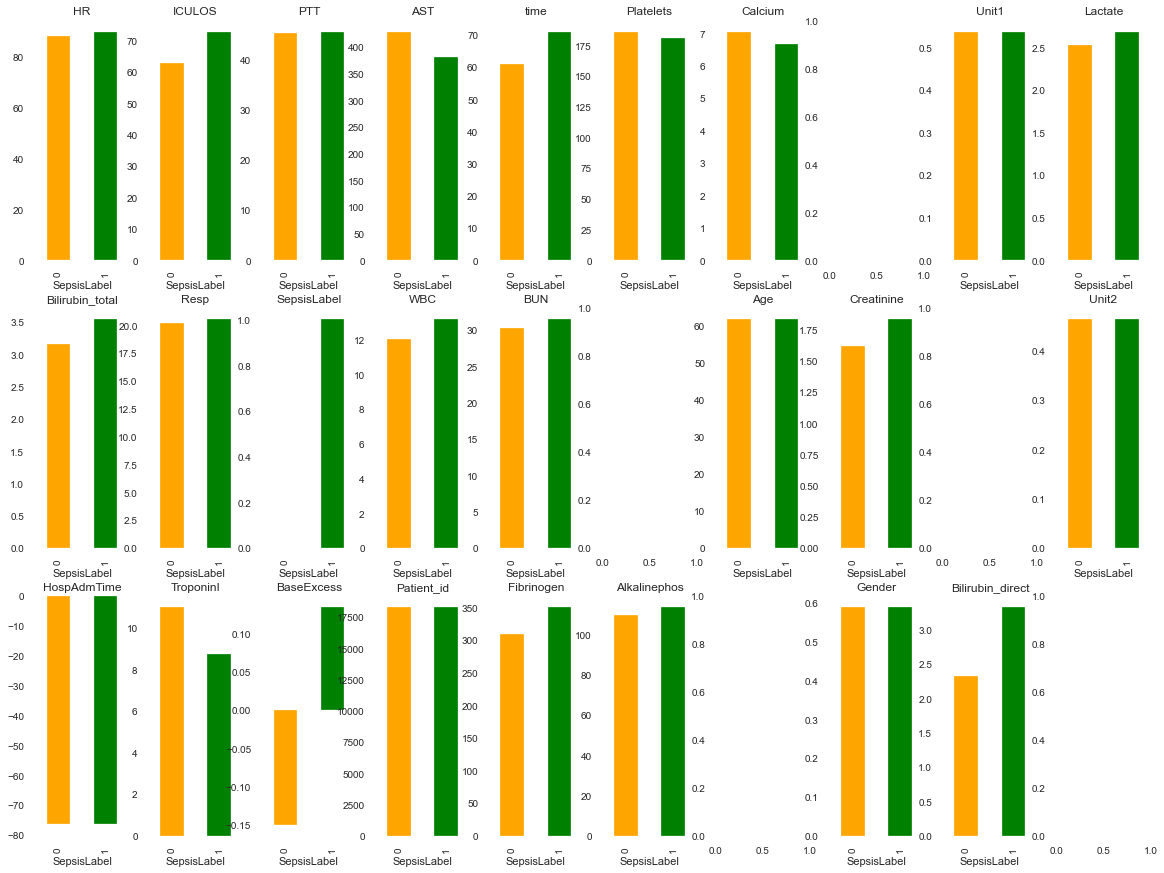

In [177]:
fig, axes = plt.subplots(3, 10, figsize=(20,15))
for index, column in enumerate(df_sepsis_develop_10.columns):
    df_sepsis_develop_10.groupby('SepsisLabel')[column].mean().plot(kind = 'bar', title=column, ax = axes[index%3, index%10], color=['orange', 'green'])

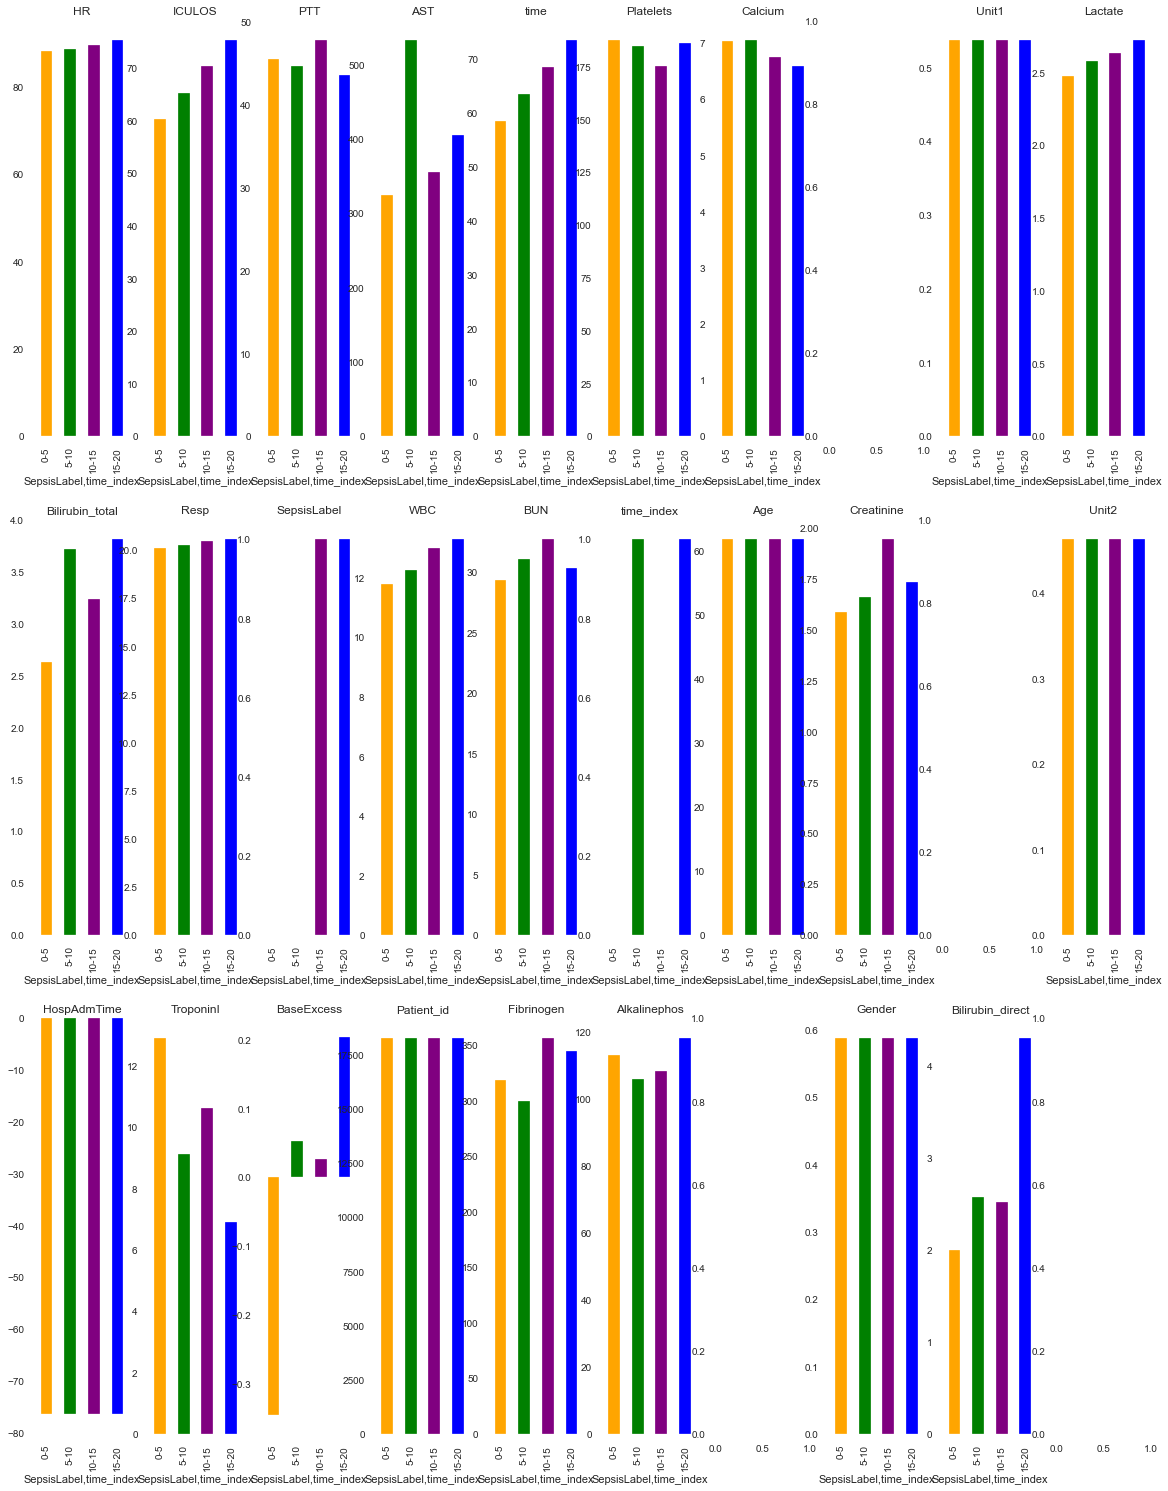

In [311]:
fig, axes = plt.subplots(3, 10, figsize=(20,26))
for index, column in enumerate(df_sepsis_develop_10.columns):
    df_sepsis_develop_10.groupby(['SepsisLabel','time_index'])[column].mean().plot(kind='bar', title=column, ax = axes[index%3, index%10], color=['orange', 'green', 'purple', 'blue'])
    axes[index%3, index%10].set_xticklabels(['0-5', '5-10', '10-15','15-20'])
    

## 4. Conclusion - By Comparing the feature difference between before and after 5 hours when sepsis happens and the feature difference between before and after 10 hours when sepsis happens, we can almost get same results, which mean 10 hours before the sepsis, the lab result and vital sign could tell us if sepsis will happen. We can use these features for early sepsis detection. 

### 1. Vital sign

  - 1.Heart rate (beats per minute) increase from average 80 to 90+.**90**
  - 5.Resp  Respiration rate (breaths per minute) increase from 18 to 22.**20**

### 2. Laboratory results 10 hours early.

  - 1.BaseExcess	Measure of excess bicarbonate (mmol/L) increase from -0.8 to 0.35. ***0.35***
  - 2.AST	Aspartate transaminase (IU/L) increae from 255 to 290. **300**
  - 3.BUN	Blood urea nitrogen (mg/dL) increase from 24 to 31.  **29**.
  - 4.Alkalinephos	Alkaline phosphatase (IU/L) increase from 100 to 110.**120**.
  - 7.Bilirubin_direct	Bilirubin direct (mg/dL) increase a lot from 1.75 to 3.0. **2.4**
  - 10.Bilirubin_total	Total bilirubin (mg/dL) increase a lot from the average 2.0 to 3.5.**3.2**
  - 11.TroponinI	Troponin I (ng/mL) increase a little bit from average 8 to average 9.5. **13**
  - 12.PTT	partial thromboplastin time (seconds) increase a little bit from 41 to 45.**45**
  - 13.WBC	Leukocyte count (count*10^3/µL) increase a lot from 11 to 13. **12** 
  - 14.Fibrinogen	(mg/dL) increase a lot from 290 to 340.**350**,**300**.
  - 15.Platelets	(count*10^3/µL) decrease a little bit from 198 to 188. **180**
### Laboratory results 5 hours early.
  - 1.BaseExcess	Measure of excess bicarbonate (mmol/L) increase from -0.7 to 0.35.***0.05***
  - 2.AST	Aspartate transaminase (IU/L) increae from 255 to 290. **550**
  - 3.BUN	Blood urea nitrogen (mg/dL) increase from 24 to 31.  **31**
  - 4.Alkalinephos	Alkaline phosphatase (IU/L) increase from 100 to 110.**110**,
  - 7.Bilirubin_direct	Bilirubin direct (mg/dL) increase a lot from 1.75 to 3.0. **2.6**.
  - 10.Bilirubin_total	Total bilirubin (mg/dL) increase a lot from the average 2.0 to 3.5.**3.0**
  - 12.PTT	partial thromboplastin time (seconds) increase a little bit from 41 to 45. **43**
  - 13.WBC	Leukocyte count (count*10^3/µL) increase a lot from 11 to 13.**14**
  - 15.Platelets	(count*10^3/µL) decrease a little bit from 198 to 188. **190**
### 3. Demographics   

  - 1.Gender	Female (0) or Male (1)  Male has more cases than women.
  - 2.Unit1	Administrative identifier for ICU unit (MICU: medical intensive care unit), has more tendecy to get sepsis, or sepsis has more ratio of the total MICU.  
  - 3.Unit2	Administrative identifier for ICU unit (SICU:surgical intensive care unit), has less case happen sepsis, or sepsis has less ratio of the total SICU.
  - 4.ICULOS	ICU length-of-stay (hours since ICU admit) increase a lot, which is twice as sepsis as the non sepsis.

In [271]:
df_sepsis_develop_5.head(20)

,HR,Resp,BaseExcess,AST,BUN,Alkalinephos,Calcium,Creatinine,Bilirubin_direct,Lactate,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
278,93.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,46,0,6,40
279,97.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,47,0,6,41
280,90.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,48,0,6,42
281,103.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,49,0,6,43
282,112.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,50,0,6,44
283,111.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,51,1,6,45
284,112.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,52,1,6,46
285,109.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.0,66.36,1,0.0,1.0,-162.76,53,1,6,47
286,99.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,54,1,6,48
287,112.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.36,1,0.0,1.0,-162.76,55,1,6,49


In [272]:
df_sepsis_develop_10.head(20)

,HR,Resp,BaseExcess,AST,BUN,Alkalinephos,Calcium,Creatinine,Bilirubin_direct,Lactate,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
2546,75.0,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.2,...,NaN,45.98,1,NaN,NaN,-219.74,126,0,71,125
2547,77.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,127,0,71,126
2548,77.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,128,0,71,127
2549,77.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,129,0,71,128
2550,78.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,130,0,71,129
2551,79.0,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.3,...,NaN,45.98,1,NaN,NaN,-219.74,131,0,71,130
2552,80.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,132,0,71,131
2553,80.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,133,0,71,132
2554,79.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,134,0,71,133
2555,NaN,NaN,NaN,165.0,NaN,124.0,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,135,0,71,134


In [286]:
new_list = [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1]

In [287]:
time_index = new_list*len(df_sepsis_develop_10['Patient_id'].unique())

In [289]:
len(time_index)

28960

In [290]:
len(df_sepsis_develop_10)

28960

In [291]:
df_sepsis_develop_10['time_index']=time_index

In [292]:
df_sepsis_develop_10.head(20)

,HR,Resp,BaseExcess,AST,BUN,Alkalinephos,Calcium,Creatinine,Bilirubin_direct,Lactate,...,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time,time_index
2546,75.0,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.2,...,45.98,1,NaN,NaN,-219.74,126,0,71,125,0
2547,77.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.98,1,NaN,NaN,-219.74,127,0,71,126,0
2548,77.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.98,1,NaN,NaN,-219.74,128,0,71,127,0
2549,77.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.98,1,NaN,NaN,-219.74,129,0,71,128,0
2550,78.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.98,1,NaN,NaN,-219.74,130,0,71,129,0
2551,79.0,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.3,...,45.98,1,NaN,NaN,-219.74,131,0,71,130,1
2552,80.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.98,1,NaN,NaN,-219.74,132,0,71,131,1
2553,80.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.98,1,NaN,NaN,-219.74,133,0,71,132,1
2554,79.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.98,1,NaN,NaN,-219.74,134,0,71,133,1
2555,NaN,NaN,NaN,165.0,NaN,124.0,NaN,NaN,NaN,NaN,...,45.98,1,NaN,NaN,-219.74,135,0,71,134,1


In [197]:
df_5to10 = df_sepsis_develop_10[~df_sepsis_develop_10.index.isin(df_sepsis_develop_5.index)]
df_5to10.head(20)

,HR,Resp,BaseExcess,AST,BUN,Alkalinephos,Calcium,Creatinine,Bilirubin_direct,Lactate,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
2546,75.0,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.20,...,NaN,45.98,1,NaN,NaN,-219.74,126,0,71,125
2547,77.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,127,0,71,126
2548,77.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,128,0,71,127
2549,77.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,129,0,71,128
2550,78.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,130,0,71,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551453,100.0,25.5,NaN,NaN,NaN,NaN,1.06,NaN,NaN,8.94,...,NaN,52.00,1,0.0,1.0,-29.08,25,1,40321,22
1551454,92.0,25.0,NaN,NaN,NaN,NaN,1.12,NaN,NaN,10.87,...,NaN,52.00,1,0.0,1.0,-29.08,26,1,40321,23
1551455,102.0,25.0,NaN,1615.0,19.0,43.0,4.75,2.44,3.6,12.24,...,46.0,52.00,1,0.0,1.0,-29.08,27,1,40321,24
1551456,88.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,52.00,1,0.0,1.0,-29.08,28,1,40321,25


In [277]:
df_5to10.head(20)

,HR,Resp,BaseExcess,AST,BUN,Alkalinephos,Calcium,Creatinine,Bilirubin_direct,Lactate,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
2546,75.0,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.2,...,NaN,45.98,1,NaN,NaN,-219.74,126,0,71,125
2547,77.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,127,0,71,126
2548,77.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,128,0,71,127
2549,77.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,129,0,71,128
2550,78.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,130,0,71,129
2561,92.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,141,1,71,140
2562,92.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,142,1,71,141
2563,96.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,143,1,71,142
2564,98.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.4,...,NaN,45.98,1,NaN,NaN,-219.74,144,1,71,143
2565,95.0,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45.98,1,NaN,NaN,-219.74,145,1,71,144


In [198]:
len(df_5to10)

14480

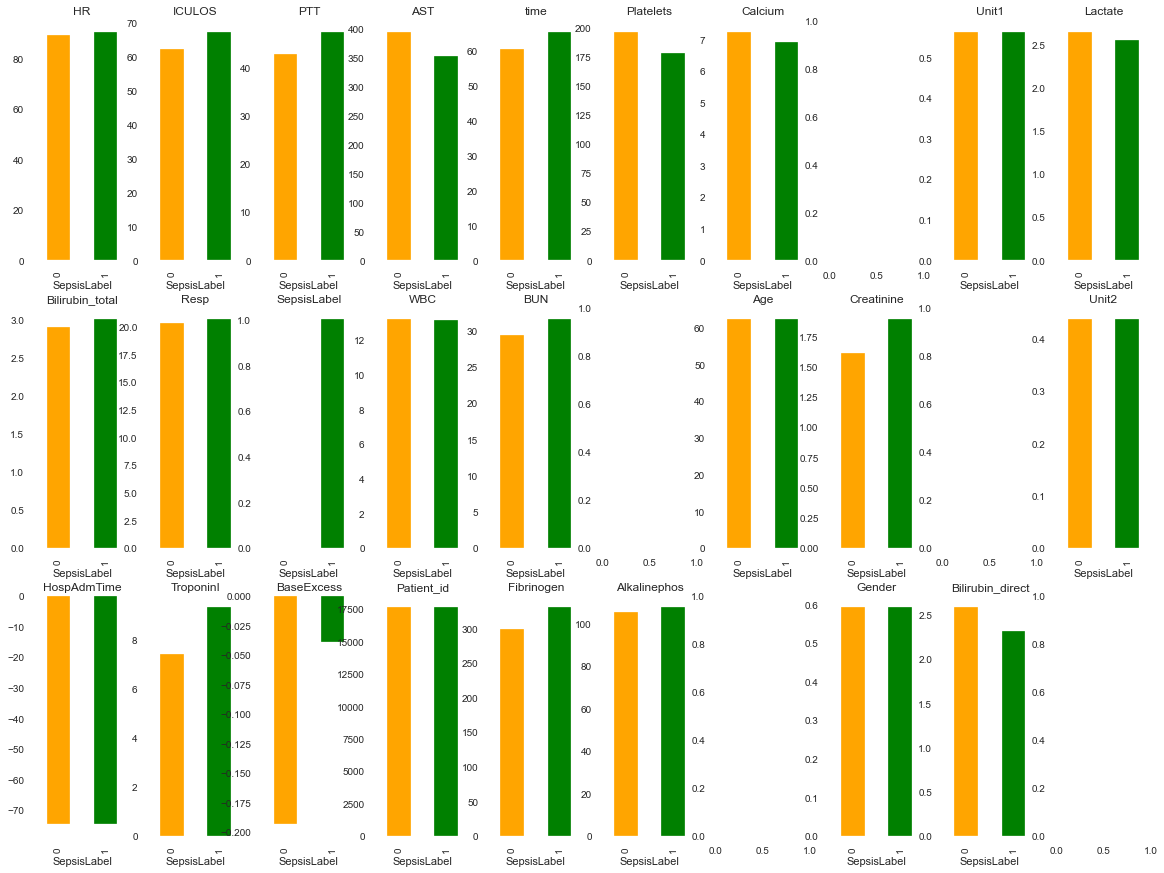

In [285]:
fig, axes = plt.subplots(3, 10, figsize=(20,15))
for index, column in enumerate(df_sepsis_develop_5.columns):
    df_sepsis_develop_5.groupby('SepsisLabel')[column].mean().plot(kind = 'bar', title=column, ax = axes[index%3, index%10], color=['orange', 'green'])

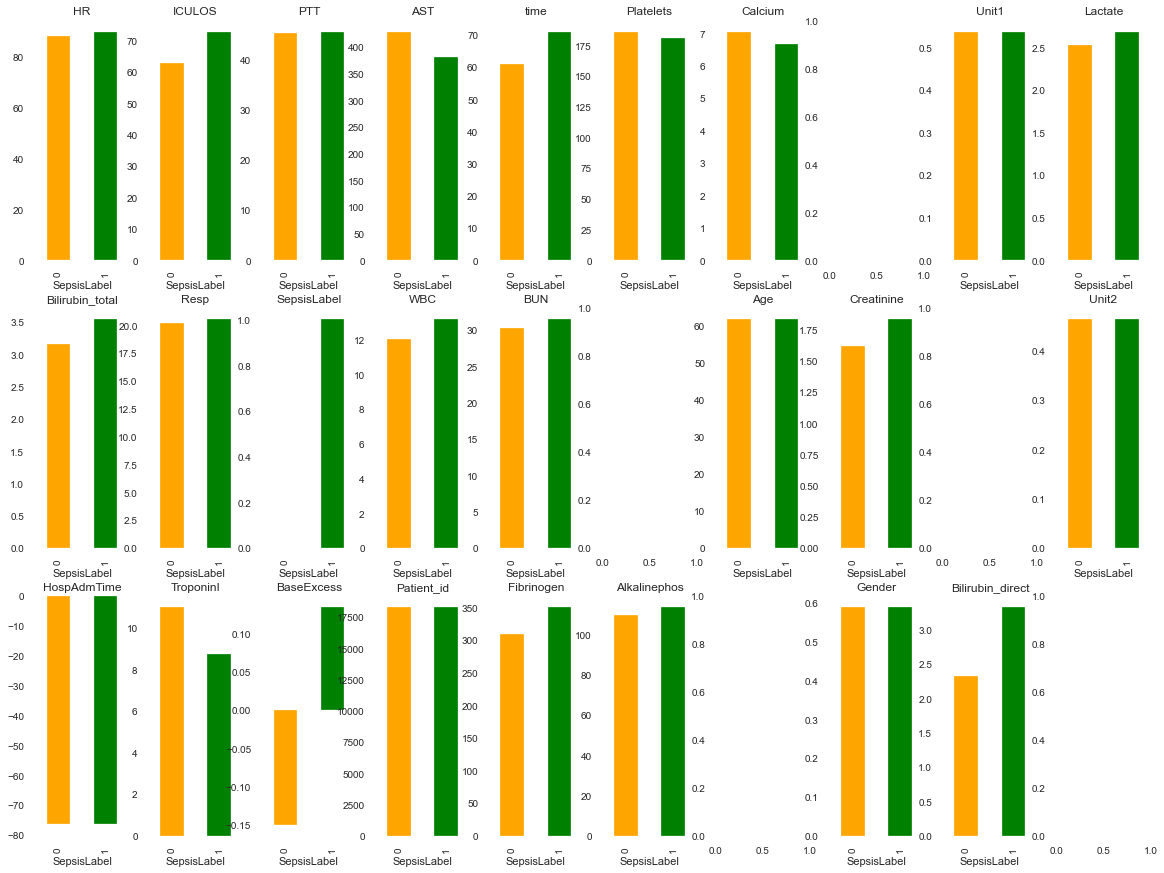

In [284]:
fig, axes = plt.subplots(3, 10, figsize=(20,15))
for index, column in enumerate(df_5to10.columns):
    df_sepsis_develop_10.groupby('SepsisLabel')[column].mean().plot(kind = 'bar', title=column, ax = axes[index%3, index%10], color=['orange', 'green'])

## 4. Conclusion - By Comparing the feature difference between before and after 5 hours when sepsis happens and the feature difference between before and after 10 hours when sepsis happens, we can almost get same results, which mean 10 hours before the sepsis, the lab result and vital sign could tell us if sepsis will happen. We can use these features for early sepsis detection. 

### 1. Vital sign

  - 1.Heart rate (beats per minute) increase from average 80 to 90+.**90**
  - 5.Resp  Respiration rate (breaths per minute) increase from 18 to 22.**20**

### 2. Laboratory results 10 hours early.

  - 1.BaseExcess	Measure of excess bicarbonate (mmol/L) increase from -0.7 to 0.35.***0.15***
  - 2.AST	Aspartate transaminase (IU/L) increae from 255 to 290. **440**
  - 3.BUN	Blood urea nitrogen (mg/dL) increase from 24 to 31.  **30**.
  - 4.Alkalinephos	Alkaline phosphatase (IU/L) increase from 100 to 110.**120**.
  - 7.Bilirubin_direct	Bilirubin direct (mg/dL) increase a lot from 1.75 to 3.0. **2.4**
  - 10.Bilirubin_total	Total bilirubin (mg/dL) increase a lot from the average 2.0 to 3.5.**3.2**
  - 11.TroponinI	Troponin I (ng/mL) increase a little bit from average 8 to average 9.5. **11.2**
  - 12.PTT	partial thromboplastin time (seconds) increase a little bit from 41 to 45.**45**
  - 13.WBC	Leukocyte count (count*10^3/µL) increase a lot from 11 to 13. **12** keep continue to increase to **14** in final 5 hours before change to sepsis status.
  - 14.Fibrinogen	(mg/dL) increase a lot from 290 to 340.**350**,**300**.
  - 15.Platelets	(count*10^3/µL) decrease a little bit from 198 to 188. **180**
### Laboratory results 5 hours early.
  - 2.AST	Aspartate transaminase (IU/L) increae from 255 to 290. **390**
  - 3.BUN	Blood urea nitrogen (mg/dL) increase from 24 to 31.  **30**
  - 4.Alkalinephos	Alkaline phosphatase (IU/L) increase from 100 to 110.**110**,
  - 7.Bilirubin_direct	Bilirubin direct (mg/dL) increase a lot from 1.75 to 3.0. **2.6**.
  - 10.Bilirubin_total	Total bilirubin (mg/dL) increase a lot from the average 2.0 to 3.5.**3.0**
  - 12.PTT	partial thromboplastin time (seconds) increase a little bit from 41 to 45. **43**
  - 13.WBC	Leukocyte count (count*10^3/µL) increase a lot from 11 to 13.**14**
  - 15.Platelets	(count*10^3/µL) decrease a little bit from 198 to 188. **190**
### 3. Demographics   

  - 1.Gender	Female (0) or Male (1)  Male has more cases than women.
  - 2.Unit1	Administrative identifier for ICU unit (MICU: medical intensive care unit), has more tendecy to get sepsis, or sepsis has more ratio of the total MICU.  
  - 3.Unit2	Administrative identifier for ICU unit (SICU:surgical intensive care unit), has less case happen sepsis, or sepsis has less ratio of the total SICU.
  - 4.ICULOS	ICU length-of-stay (hours since ICU admit) increase a lot, which is twice as sepsis as the non sepsis.
###  From the above results, the WBC and Platelets in blood system will change first. then the Fibrinogen in the liver function and later TroponinI in the skeletal and heart (cardiac) will change accordingly, then BaseExcess, AST, BUN, Alkalinephos, Creatinine, Bilirubin_direct in the kidney system will change.The sign of the early stage of sepsis,  will be the WBC, and cardiac and kidney function change which could help early diagnosis the patient who will possibly to have sepsis and could apply some treatment to avoid the organ disfunction.

### Other analysis undergoing

In [71]:
Number_of_Female_in_sepsis_develop = len(df_sepsis_develop[df_sepsis_develop['Gender']==0]['Patient_id'].unique())
Number_of_Female_in_sepsis_develop

1018

In [72]:
Number_of_Male_in_sepsis_develop = len(patient_id_sepsis_develop) - Number_of_Female_in_sepsis_develop
Number_of_Male_in_sepsis_develop

1488

In [73]:
Male_Female_in_sepsis_develop_ratio = Number_of_Male_in_sepsis_develop/Number_of_Female_in_sepsis_develop
Male_Female_in_sepsis_develop_ratio

1.461689587426326

In [74]:
# Get the dataframe with the people without developing to sepsis.
df_sepsis_no_develop_unique = df_sepsis[df_sepsis['time']==0][df_sepsis['SepsisLabel']==1]
patient_id_sepsis_no_develop = df_sepsis_no_develop_unique['Patient_id'].unique()

/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [75]:
df_sepsis_no_develop =  df_sepsis[df_sepsis['Patient_id'].isin(patient_id_sepsis_no_develop)]
df_sepsis_no_develop

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
2055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,60.42,1,1.0,0.0,-25.95,1,1,58,0
2056,115.0,93.0,36.72,89.0,71.0,61.0,14.0,NaN,-12.0,11.0,...,NaN,60.42,1,1.0,0.0,-25.95,2,1,58,1
2057,106.0,96.0,NaN,99.0,NaN,57.0,30.0,NaN,NaN,NaN,...,NaN,60.42,1,1.0,0.0,-25.95,3,1,58,2
2058,106.0,92.0,NaN,89.0,65.0,53.0,23.0,NaN,NaN,NaN,...,NaN,60.42,1,1.0,0.0,-25.95,4,1,58,3
2059,113.0,89.0,NaN,95.0,60.5,55.0,NaN,NaN,NaN,NaN,...,NaN,60.42,1,1.0,0.0,-25.95,5,1,58,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551484,87.5,100.0,37.35,146.0,101.5,72.5,14.5,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,6,1,40323,5
1551485,74.0,100.0,37.20,140.0,98.0,69.0,14.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,7,1,40323,6
1551486,85.0,97.0,NaN,147.0,100.0,70.0,12.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,8,1,40323,7
1551487,78.0,99.0,NaN,157.0,110.0,77.0,12.0,NaN,NaN,NaN,...,NaN,39.00,0,1.0,0.0,-5.77,9,1,40323,8


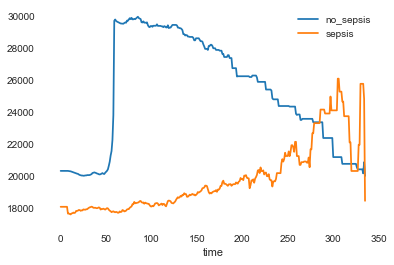

In [193]:
# Unfinished part. 
fig, ax = plt.subplots()

#df_sepsis_develop.groupby('time')['Gender'].mean().plot(label="1")
df_no_sepsis.groupby('time')['Patient_id'].mean().plot(label="no_sepsis")
df_sepsis.groupby('time')['Patient_id'].mean().plot(label="sepsis")
#df_sepsis_no_develop.groupby('time')['Gender'].mean().plot(label="4")
ax.legend()

No handles with labels found to put in legend.


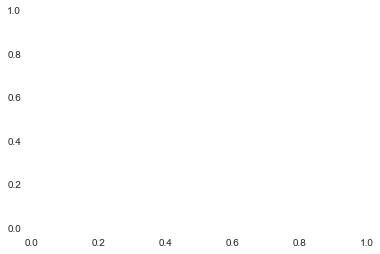

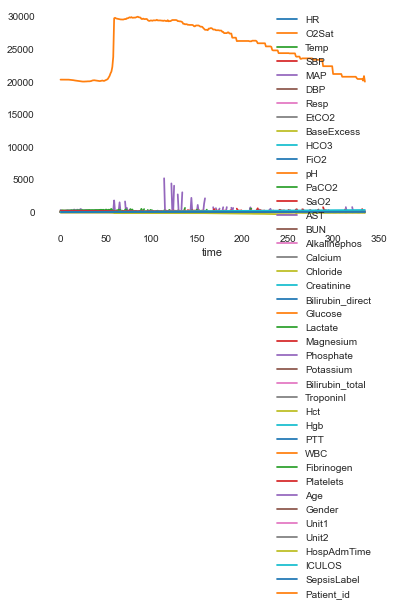

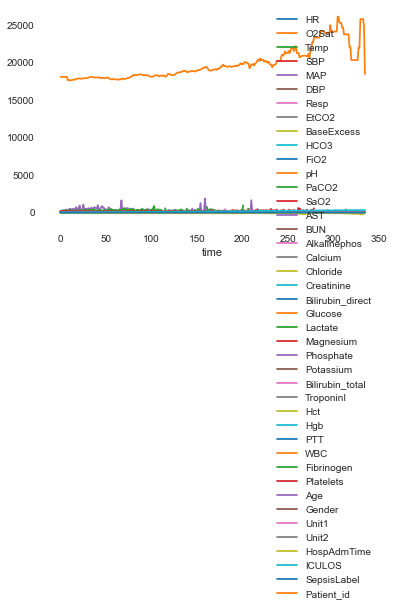

In [182]:
fig, ax = plt.subplots()

#df_sepsis_develop.groupby('time')['Gender'].mean().plot(label="1")
df_no_sepsis.groupby('time').mean().plot(label="2")
df_sepsis.groupby('time').mean().plot(label="3")
#df_sepsis_no_develop.groupby('time')['Gender'].mean().plot(label="4")
ax.legend()